In [1]:
import numpy as np
import scipy as sp
import arviz as az
from src.baseSIR import mle
from src.baseSIR import mle_sir
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import time

In [2]:
Size_c0 = pd.DataFrame(np.genfromtxt(f"../../Data/Final_size_no_c_free_G.csv", delimiter= ","), columns = ("S","N"))
Size_c1 = pd.DataFrame(np.genfromtxt(f"../../Data/Final_size_c1_free_G.csv", delimiter= ","), columns = ("S","N"))
Size_c2 = pd.DataFrame(np.genfromtxt(f"../../Data/Final_size_c2_free_G.csv", delimiter= ","),columns = ("S","N"))
Size_c3 = pd.DataFrame(np.genfromtxt(f"../../Data/Final_size_c3_free_G.csv", delimiter= ","),columns = ("S","N"))

Ext_c0 = pd.DataFrame(np.genfromtxt(f"../../Data/Pr_ext_no_c_free_G.csv", delimiter= ","),columns = ("S","N"))
Ext_c1 = pd.DataFrame(np.genfromtxt(f"../../Data/Pr_ext_c1_free_G.csv", delimiter= ","), columns = ("S","N"))
Ext_c2 = pd.DataFrame(np.genfromtxt(f"../../Data/Pr_ext_c2_free_G.csv", delimiter= ","), columns = ("S","N"))
Ext_c3 = pd.DataFrame(np.genfromtxt(f"../../Data/Pr_ext_c3_free_G.csv", delimiter= ","), columns = ("S","N"))

In [3]:
print(Size_c0)

             S       N
0   957.336343    10.0
1   926.342711    10.0
2   934.482759    10.0
3   925.440806    10.0
4   965.837104    10.0
5   915.598886    10.0
6   924.324324    10.0
7   854.827586    10.0
8   934.562212    10.0
9   909.020619    10.0
10  967.400000   100.0
11  955.220000   100.0
12  954.094094   100.0
13  944.440000   100.0
14  963.560000   100.0
15  945.100000   100.0
16  943.730000   100.0
17  951.560000   100.0
18  949.090000   100.0
19  952.920000   100.0
20  970.077000  1000.0
21  961.930000  1000.0
22  957.392000  1000.0
23  940.156000  1000.0
24  962.124000  1000.0
25  954.578000  1000.0
26  942.398000  1000.0
27  952.248000  1000.0
28  952.072000  1000.0
29  948.824000  1000.0


In [4]:
Size_c0["C"] = "No Control"
Size_c1["C"] = "Reduction in Beta: 0.5*B"
Size_c2["C"] = "Additive Gamma: Gamma + 1"
Size_c3["C"] = "20% Cull every 0.5 Time Units"

Ext_c0["C"] = "No Control"
Ext_c1["C"] = "Reduction in Beta: 0.5*B"
Ext_c2["C"] = "Additive Gamma: Gamma + 1"
Ext_c3["C"] = "20% Cull every 0.5 Time Units"

Sizes = pd.concat([Size_c0,Size_c1,Size_c2,Size_c3])

Exts = pd.concat([Ext_c0,Ext_c1,Ext_c2,Ext_c3])

In [5]:
print(Exts)

        S       N                              C
0   0.557    10.0                     No Control
1   0.609    10.0                     No Control
2   0.594    10.0                     No Control
3   0.603    10.0                     No Control
4   0.558    10.0                     No Control
..    ...     ...                            ...
25  0.000  1000.0  20% Cull every 0.5 Time Units
26  0.000  1000.0  20% Cull every 0.5 Time Units
27  0.000  1000.0  20% Cull every 0.5 Time Units
28  0.000  1000.0  20% Cull every 0.5 Time Units
29  0.000  1000.0  20% Cull every 0.5 Time Units

[120 rows x 3 columns]


In [6]:
print(Sizes[Sizes["C"] == "1"])

Empty DataFrame
Columns: [S, N, C]
Index: []


C:\Users\ollie\AppData\Local\Temp\ipykernel_1268\2707413883.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


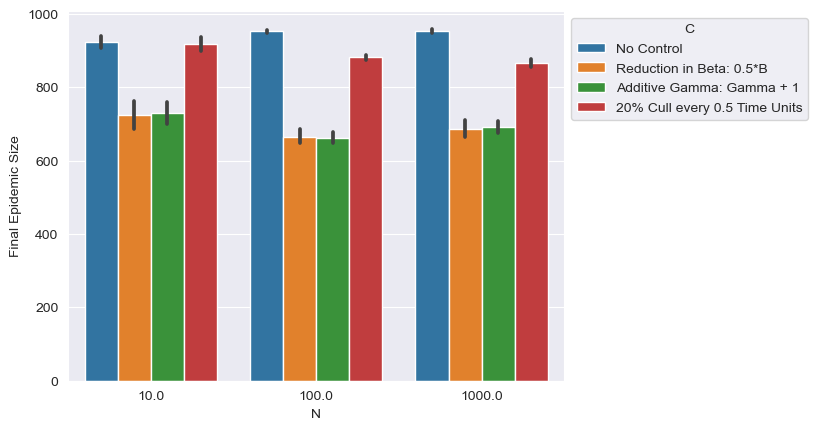

In [7]:
fig, ax0 = plt.subplots()
sns.barplot(data = Sizes, x = "N", y = "S", hue = "C", ax = ax0)
sns.move_legend(ax0, "upper left", bbox_to_anchor=(1, 1))
ax0.set_xlabel("N")
ax0.set_ylabel("Final Epidemic Size")
fig.show()

C:\Users\ollie\AppData\Local\Temp\ipykernel_1268\2267126336.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


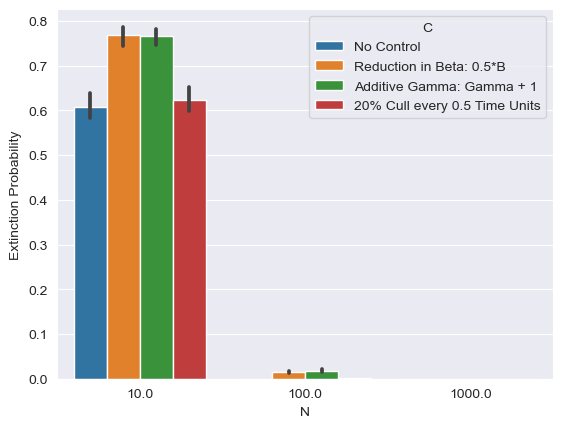

In [8]:
fig, ax0 = plt.subplots()
sns.barplot(data = Exts, x = "N", y = "S", hue = "C", ax = ax0)
ax0.set_xlabel("N")
ax0.set_ylabel("Extinction Probability")
fig.show()

In [11]:
Size_c0[Size_c0["N"] == 10]["S"]

0    957.336343
1    926.342711
2    934.482759
3    925.440806
4    965.837104
5    915.598886
6    924.324324
7    854.827586
8    934.562212
9    909.020619
Name: S, dtype: float64

In [17]:
sp.stats.ttest_rel(Size_c0[Size_c0["N"] == 10]["S"], Size_c0[Size_c0["N"] == 1000]["S"])

TtestResult(statistic=-3.3909746348364975, pvalue=0.007986753087423288, df=9)